## Linear Regression
The aim of this process is to build a linear regression model in order to predict the prices of house based on certain features.
Data Source = https://www.kaggle.com/usgs/earthquake-database/data

In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from scipy import stats
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)
dataset = pd.read_csv("earthquake_database.csv")
dataset.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
dataset.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [3]:
dataset.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [4]:
ds = dataset.copy()

In [5]:
ds.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [6]:
ds.dropna()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
565,12/20/1966,15:30:01,37.302167,-116.408333,Nuclear Explosion,1.20,31.61,16.0,5.62,ML,...,10.0,261.00,1.476000,99.000,0.8600,CI3329931,CI,CI,CI,Reviewed
897,4/26/1968,15:00:02,37.295333,-116.455667,Nuclear Explosion,1.20,31.61,17.0,5.63,ML,...,6.0,261.00,1.438000,99.000,1.0300,CI3342128,CI,CI,CI,Reviewed
1129,12/19/1968,16:30:01,37.231500,-116.473667,Nuclear Explosion,1.40,31.61,16.0,5.52,ML,...,6.0,257.00,1.415000,99.000,1.3600,CI3342181,CI,CI,CI,Reviewed
1380,9/16/1969,14:30:01,37.314167,-116.460667,Nuclear Explosion,1.20,31.61,13.0,5.82,ML,...,8.0,268.00,1.437000,99.000,0.3300,CI3326197,CI,CI,CI,Reviewed
1532,3/26/1970,19:00:01,37.300500,-116.534167,Nuclear Explosion,1.20,31.61,16.0,5.54,ML,...,10.0,260.00,1.377000,99.000,0.3500,CI3325031,CI,CI,CI,Reviewed
2723,6/6/1973,13:00:01,37.245000,-116.346000,Nuclear Explosion,1.10,31.61,17.0,5.64,ML,...,8.0,259.00,1.517000,99.000,0.5500,CI3319623,CI,CI,CI,Reviewed
3307,11/22/1974,16:25:34,30.250000,-114.800000,Earthquake,6.00,31.61,20.0,5.55,ML,...,4.0,312.00,2.641000,99.000,3.2200,CI3319062,CI,CI,CI,Reviewed
3516,6/26/1975,12:30:01,37.278833,-116.368667,Nuclear Explosion,6.00,31.61,19.0,5.52,ML,...,13.0,260.00,1.504000,99.000,3.4400,CI12328563,CI,CI,CI,Reviewed
3673,10/28/1975,14:30:00,37.290167,-116.411500,Nuclear Explosion,1.30,31.61,19.0,5.67,ML,...,8.0,260.00,1.472000,99.000,2.7500,CI3006257,CI,CI,CI,Reviewed
3754,1/3/1976,19:15:01,37.296500,-116.333167,Nuclear Explosion,1.50,31.61,20.0,5.84,ML,...,8.0,261.00,1.534000,99.000,0.4400,CI3001652,CI,CI,CI,Reviewed


In [7]:
ds.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [8]:
ds = dataset.fillna(' ')

In [9]:
ds.describe()

,Latitude,Longitude,Depth,Magnitude
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531
std,30.113183,125.511959,122.651898,0.423066
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.653000,-76.349750,14.522500,5.600000
50%,-3.568500,103.982000,33.000000,5.700000
75%,26.190750,145.026250,54.000000,6.000000
max,86.005000,179.998000,700.000000,9.100000


In [10]:
ds.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

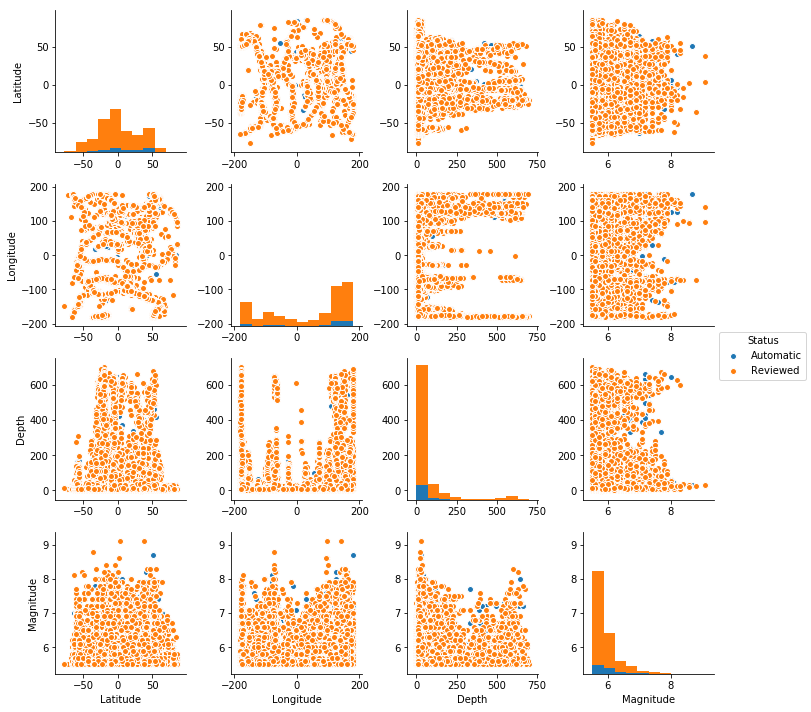

In [11]:
sns.pairplot(ds, hue="Status")
plt.show()

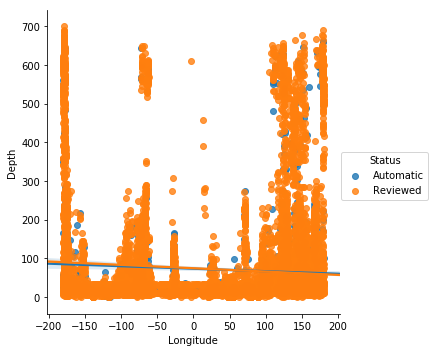

In [12]:
sns.lmplot(y="Depth", x="Longitude", data=ds,  hue="Status")
plt.show()

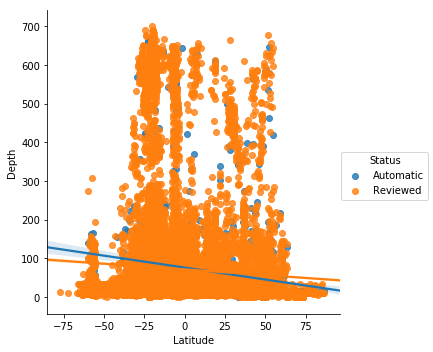

In [13]:
sns.lmplot(y="Depth", x="Latitude", data=ds,  hue="Status")
plt.show()

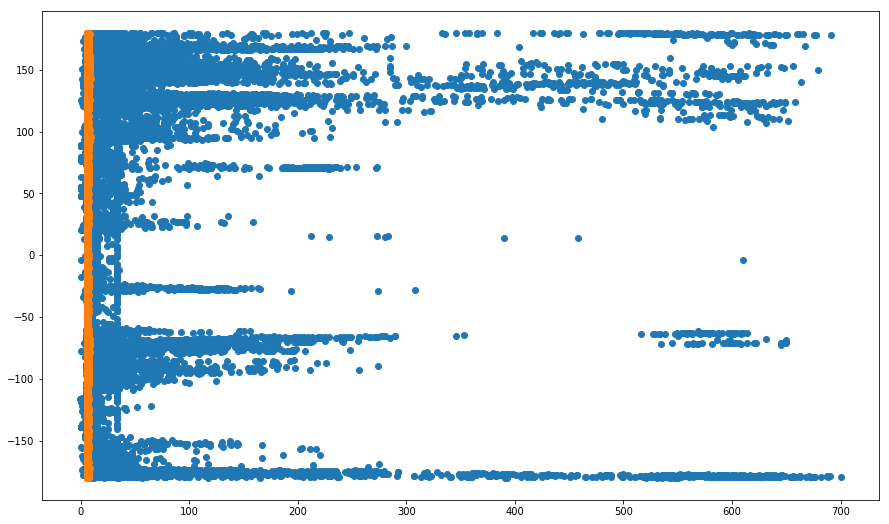

In [14]:
X = ds[["Depth", 'Magnitude']]
y = ds[["Longitude"]]
plt.plot(X, y, "o")

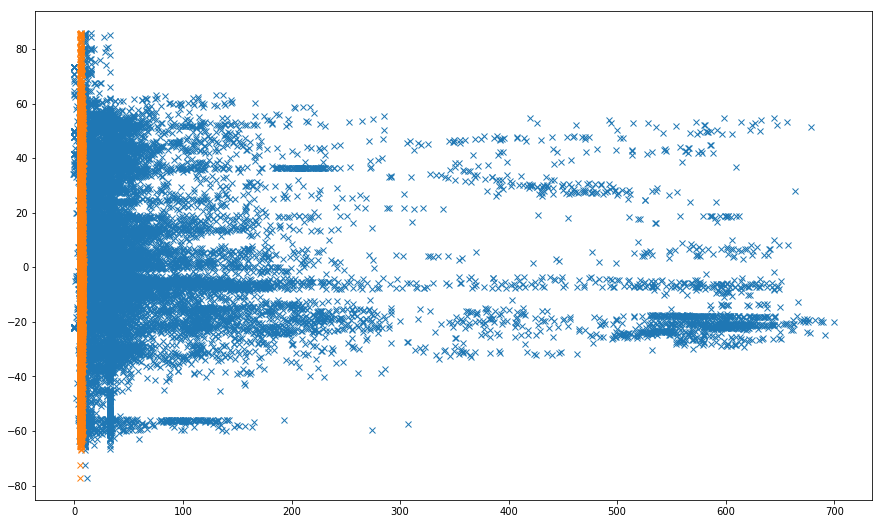

In [15]:
X = ds[["Depth", 'Magnitude']]
y = ds[["Latitude"]]
plt.plot(X, y, "x")

In [16]:
from sklearn import linear_model

X = ds[["Depth", "Magnitude"]]
y = ds[["Longitude"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-24.95388182] [[ -0.08883806  12.04935927]]


In [17]:
import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

C:\Users\Parija\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Longitude   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1282.
Date:                Sun, 13 May 2018   Prob (F-statistic):               0.00
Time:                        12:40:17   Log-Likelihood:            -1.4625e+05
No. Observations:               23412   AIC:                         2.925e+05
Df Residuals:                   23410   BIC:                         2.925e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Depth         -0.0891      0.007    -13.380      0.000      -0.102      -0.076
Magnitude      7.8323      0.160     48.986      0.000       7.519       8.146
==============================================================================
Omnibus:                    46538.825   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2815.669
Skew:                          -0.566   Prob(JB):                         0.00
Kurtosis:                       1.733   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  Depth       -0.089101
Magnitude    7.832308
dtype: float64
R2:  0.0987204632014


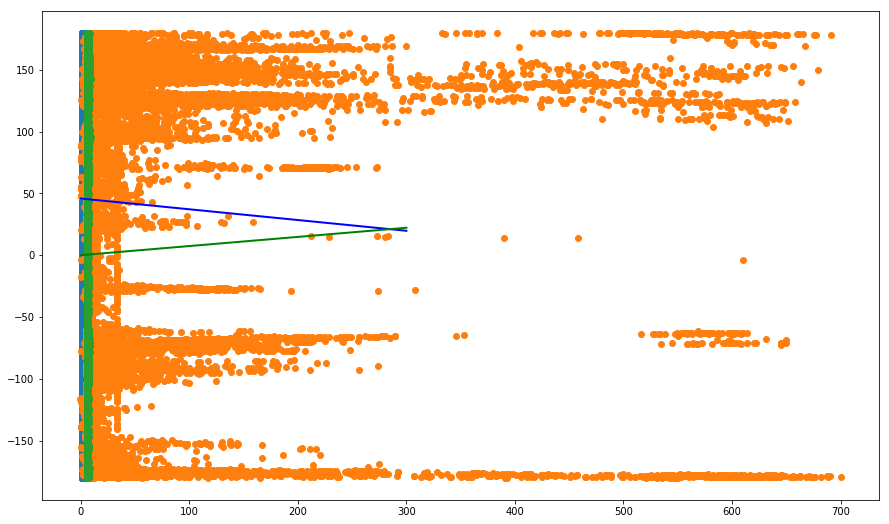

In [19]:
#  Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
plt.plot(X, y, "o")
x2 = np.linspace(0, 300, 6)
y2 = 45.85 - (0.087*x2)
plt.plot(x2, y2, lw=2, color="b")

x2 = np.linspace(0, 300, 6)
y2 = (0.073988*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X,y,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[-0.01478607  0.00146436  0.01014045  0.01715068 -0.00198856]
0.00239617154806
0.0108902985382


C:\Users\Parija\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print(lm.intercept_)

[-30.90014859]


In [23]:
X_train.columns

Index(['const', 'Depth', 'Magnitude'], dtype='object')

In [24]:
lm.coef_

array([[  0.        ,  -0.09425827,  13.15733153]])

In [25]:
predictions = lm.predict(X_test)

In [26]:
predictions

array([[ 40.79760185],
       [ 41.86272025],
       [ 38.35465207],
       ..., 
       [ 47.56478414],
       [ 40.05130085],
       [ 43.15405849]])

In [27]:
y_test

,Longitude
19944,-72.433000
17112,94.057000
8198,-25.640000
19881,-110.357000
21018,138.838000
22020,-76.644000
1924,-104.833000
9796,143.306000
19444,144.102000
3452,142.074000


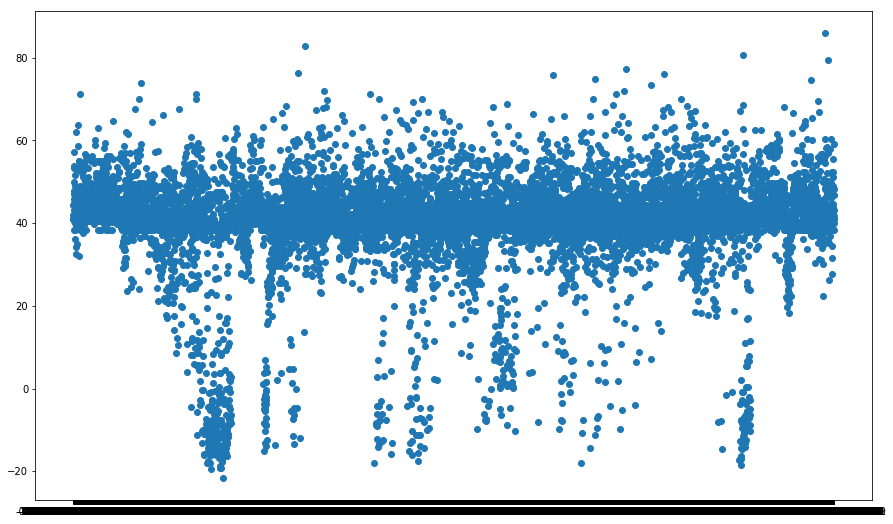

In [28]:
plt.scatter(y_test,predictions)

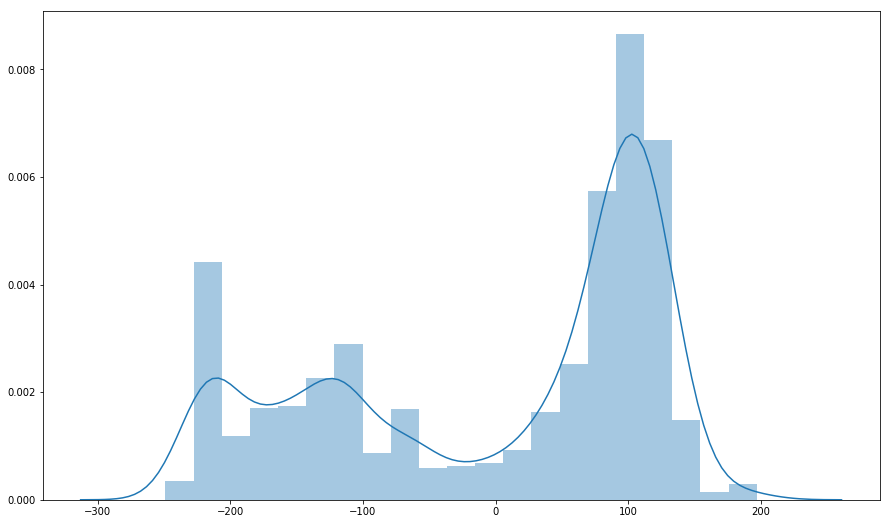

In [29]:
sns.distplot((y_test-predictions))

In [30]:
from sklearn import metrics

In [31]:
#Mean Absolute Error (MAE)
metrics.mean_absolute_error(y_test,predictions)

114.05476881011812

In [32]:
#Mean Squared Error (MSE)
metrics.mean_squared_error(y_test,predictions)

15693.568386698083

In [33]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test,predictions))

125.27397330131301

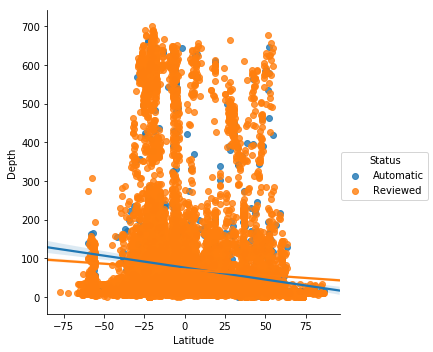

In [34]:
sns.lmplot(y="Depth", x="Latitude", data=ds,  hue="Status")
plt.show()

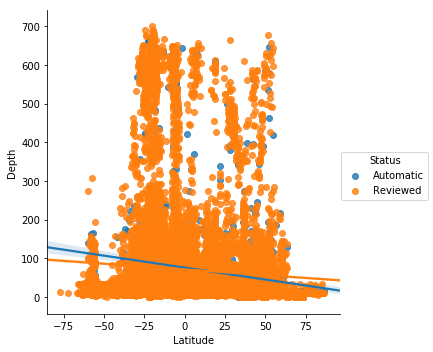

In [35]:
sns.lmplot(y="Depth", x="Latitude", data=ds,  hue="Status")
plt.show()

In [36]:
ds.corr()

,Latitude,Longitude,Depth,Magnitude
Latitude,1.000000,0.203546,-0.081020,0.034987
Longitude,0.203546,1.000000,-0.085861,0.038579
Depth,-0.081020,-0.085861,1.000000,0.023457
Magnitude,0.034987,0.038579,0.023457,1.000000


### Questions & Answers:

* Is the relationship significant?
> Yes, the relation is insignificant between Depth and Magnitude. But the relation between Depth and (Longitude & Latitude) is somewhat significant.
* Are any model assumptions violated?   
> The model has been assumed based on the co-relation obtained between the independent and dependent variables.
* Is there any multi-colinearity in the model?
> The co-relation ranged between -0.08 to 0.20.
* In the multiple regression models are predictor variables independent of all the other predictor variables?
> Well, in this case after the two variables on which the model has been predicted, we can somewhat say that 'Depth' is independent of the 'Magnitude' of an earthquake.
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
> In the order of high to low: Longitude, Depth, Magnitude.
* Does the model make sense?
> Yes, the model makes sense as the final residual plot which shows the original price values and the predicted values are pretty much in sync with each other.
* Cross-validate the model. How well did it do?
> Cross validation average accuracy
* Does regularization help with creating models that validate better on out of sample data?
> I have used ridge and lasso regression as regularization methods to penalise the loss function for high coefficients.